In [1]:
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

In [3]:
# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()
# Copy original dataframe
dfc = df.copy()

In [4]:
# Data Cleanup
dfc['job_posted_date'] = pd.to_datetime(dfc['job_posted_date'])
dfc['job_skills'] = dfc['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [16]:
dfc_US = dfc[(dfc['job_country'] == 'United States')].dropna(subset=['salary_year_avg'])
job_titles = dfc_US['job_title_short'].value_counts().index[:6].tolist()
dfc_US_top6 = dfc_US[dfc_US['job_title_short'].isin(job_titles)]
job_order = dfc_US_top6.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index

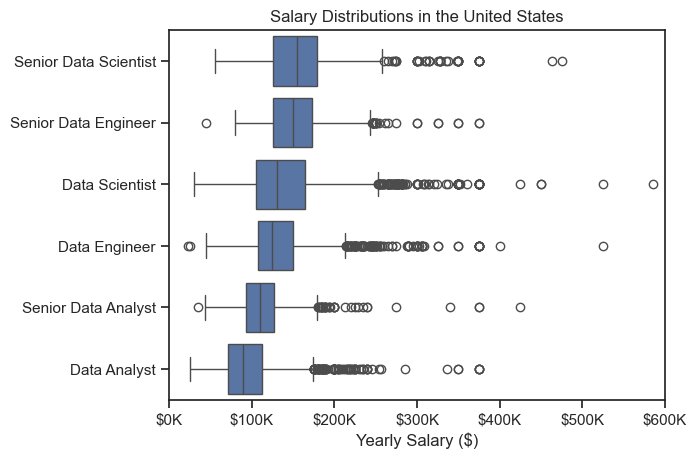

In [18]:
sns.boxplot(data=dfc_US_top6, x='salary_year_avg', y='job_title_short', order=job_order)
sns.set_theme(style='ticks')

plt.title("Salary Distributions in the United States")
plt.xlabel('Yearly Salary ($)')
plt.ylabel('')
plt.xlim(0, 600000)
ticks_x = plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K')
plt.gca().xaxis.set_major_formatter(ticks_x)
plt.show()